In [29]:
# importing all the important libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

#libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

#importing libraries for models
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#library to deal with warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("marketing_campaign.xlsx")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### EDA

In [4]:
#checking info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#statistical analysis of the data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# checking for missing values
def missing_rep(df):
    miss = df.isna().sum()
    miss = miss[miss>0]
    miss_p = miss/df.shape[0]
    miss_t = miss_p>0.03

    return pd.DataFrame({"Missings" : miss, "Proportion of Missings" : miss_p, "Higher than 3%" : miss_t})



missing_rep(df)

,Missings,Proportion of Missings,Higher than 3%
Income,24,0.010714,False


In [7]:
# let's check the range of the feature Income
df['Income'].max() - df['Income'].min()

#imputing missing values
from sklearn.impute import KNNImputer
df['Income'] = KNNImputer(n_neighbors=4).fit_transform(df['Income'].values.reshape(-1,1))



In [8]:
#checking response %

df["Response"].mean()

0.14910714285714285

In [9]:
# List of categorical features:
feat_c = ["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
         "AcceptedCmp5", "Complain"]


#descriptive stats about these categorical features.
def cat_feat_describe(df, fc, target, n, thresh):

    fl = []
   
    if (type(fc)==list):
    
        for feature in fc:
            fl.append(df.groupby([feature]).agg({target : ["count", "mean"]}))    

            fm = pd.concat(fl, keys=fc)

            fm = pd.DataFrame({"Number of observations" : fm.iloc[:,0], "Discrimination ability" : fm.iloc[:,1],
                                 "More than n observations" : fm.iloc[:,0]>n,
                                 "Higher discrimination ability than the Threshold" : fm.iloc[:,1]>thresh,
                                 "Both True" : ((fm.iloc[:,0]>n) & (fm.iloc[:,1]>thresh))})
    else:
        fm = (df.groupby(fc).agg({target : ["count", "mean"]}))
        
        fm = pd.DataFrame({"Number of observations" : fm.iloc[:,0], "Discrimination ability" : fm.iloc[:,1],
                                 "More than n observations" : fm.iloc[:,0]>n,
                                 "Higher discrimination ability than the Threshold" : fm.iloc[:,1]>thresh,
                                 "Both True" : ((fm.iloc[:,0]>n) & (fm.iloc[:,1]>thresh))})
        
    return fm






feat_sum = cat_feat_describe(df, feat_c, "Response", 40, 0.15)
feat_sum

Number of observations  Discrimination ability  \
Education      2n Cycle                       203                0.108374   
               Basic                           54                0.037037   
               Graduation                    1127                0.134871   
               Master                         370                0.154054   
               PhD                            486                0.207819   
Marital_Status Absurd                           2                0.500000   
               Alone                            3                0.333333   
               Divorced                       232                0.206897   
               Married                        864                0.113426   
               Single                         480                0.220833   
               Together                       580                0.103448   
               Widow                           77                0.246753   
               YOLO                             2                0.500000   
Kidhome        0                             1293                0.171694   
               1                              899                0.122358   
               2                               48                0.041667   
Teenhome       0                             1158                0.204663   
               1                             1030                0.089320   
               2                               52                0.096154   
AcceptedCmp1   0                             2096                0.121660   
               1                              144                0.548611   
AcceptedCmp2   0                             2210                0.142081   
               1                               30                0.666667   
AcceptedCmp3   0                             2077                0.123736   
               1                              163                0.472393   
AcceptedCmp4   0                             2073                0.131211   
               1                              167                0.371257   
AcceptedCmp5   0                             2077                0.116514   
               1                              163                0.564417   
Complain       0                             2219                0.149166   
               1                               21                0.142857   

                           More than n observations  \
Education      2n Cycle                        True   
               Basic                           True   
               Graduation                      True   
               Master                          True   
               PhD                             True   
Marital_Status Absurd                         False   
               Alone                          False   
               Divorced                        True   
               Married                         True   
               Single                          True   
               Together                        True   
               Widow                           True   
               YOLO                           False   
Kidhome        0                               True   
               1                               True   
               2                               True   
Teenhome       0                               True   
               1                               True   
               2                               True   
AcceptedCmp1   0                               True   
               1                               True   
AcceptedCmp2   0                               True   
               1                              False   
AcceptedCmp3   0                               True   
               1                               True   
AcceptedCmp4   0                               True   
               1                               True   
AcceptedCmp5   0      

In [10]:
feat_sum[feat_sum["Both True"]]

Number of observations  Discrimination ability  \
Education      Master                       370                0.154054   
               PhD                          486                0.207819   
Marital_Status Divorced                     232                0.206897   
               Single                       480                0.220833   
               Widow                         77                0.246753   
Kidhome        0                           1293                0.171694   
Teenhome       0                           1158                0.204663   
AcceptedCmp1   1                            144                0.548611   
AcceptedCmp3   1                            163                0.472393   
AcceptedCmp4   1                            167                0.371257   
AcceptedCmp5   1                            163                0.564417   

                         More than n observations  \
Education      Master                        True   
               PhD                           True   
Marital_Status Divorced                      True   
               Single                        True   
               Widow                         True   
Kidhome        0                             True   
Teenhome       0                             True   
AcceptedCmp1   1                             True   
AcceptedCmp3   1                             True   
AcceptedCmp4   1                             True   
AcceptedCmp5   1                             True   

                         Higher discrimination ability than the Threshold  \
Education      Master                                                True   
               PhD                                                   True   
Marital_Status Divorced                                              True   
               Single                                                True   
               Widow                                                 True   
Kidhome        0                                                     True   
Teenhome       0                                                     True   
AcceptedCmp1   1                                                     True   
AcceptedCmp3   1                                                     True   
AcceptedCmp4   1                                                     True   
AcceptedCmp5   1                                                     True   

                         Both True  
Education      Master         True  
               PhD            True  
Marital_Status Divorced       True  
               Single         True  
               Widow          True  
Kidhome        0              True  
Teenhome       0              True  
AcceptedCmp1   1              True  
AcceptedCmp3   1              True  
AcceptedCmp4   1              True  
AcceptedCmp5   1              True

In [11]:
feat_sum[-feat_sum["More than n observations"]]

Number of observations  Discrimination ability  \
Marital_Status Absurd                       2                0.500000   
               Alone                        3                0.333333   
               YOLO                         2                0.500000   
AcceptedCmp2   1                           30                0.666667   
Complain       1                           21                0.142857   

                       More than n observations  \
Marital_Status Absurd                     False   
               Alone                      False   
               YOLO                       False   
AcceptedCmp2   1                          False   
Complain       1                          False   

                       Higher discrimination ability than the Threshold  \
Marital_Status Absurd                                              True   
               Alone                                               True   
               YOLO                                                True   
AcceptedCmp2   1                                                   True   
Complain       1                                                  False   

                       Both True  
Marital_Status Absurd      False  
               Alone       False  
               YOLO        False  
AcceptedCmp2   1           False  
Complain       1           False

In [12]:
from datetime import timedelta

days_list = []
for val in df['Recency'].values :
     days_list.append((datetime.today().date() - timedelta(days=int(val))).strftime('%A'))
df['last_purchase_day_type'] = days_list
df['last_purchase_day_type'].head()

0    Wednesday
1      Tuesday
2       Sunday
3       Sunday
4      Tuesday
Name: last_purchase_day_type, dtype: object

In [13]:
df['last_purchase_day_type'] = df['last_purchase_day_type'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [14]:

df['Tot_amnt_spent'] = (df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds'])


df['MntWines'] = round((df['MntWines']/df['Tot_amnt_spent'])*100, 2)
df['MntFruits'] = round((df['MntFruits']/df['Tot_amnt_spent'])*100, 2)
df['MntMeatProducts'] = round((df['MntMeatProducts']/df['Tot_amnt_spent'])*100, 2)
df['MntFishProducts'] = round((df['MntFishProducts']/df['Tot_amnt_spent'])*100, 2)
df['MntSweetProducts'] = round((df['MntSweetProducts']/df['Tot_amnt_spent'])*100, 2)
df['MntGoldProds'] = round((df['MntGoldProds']/df['Tot_amnt_spent'])*100, 2)



In [15]:
df['Income'].value_counts().index.sort_values(ascending=True)

Float64Index([  1730.0,   2447.0,   3502.0,   4023.0,   4428.0,   4861.0,
                5305.0,   5648.0,   6560.0,   6835.0,
              ...
              105471.0, 113734.0, 153924.0, 156924.0, 157146.0, 157243.0,
              157733.0, 160803.0, 162397.0, 666666.0],
             dtype='float64', length=1975)

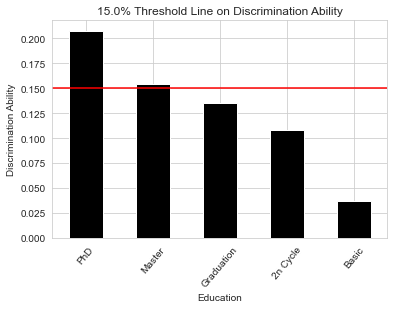

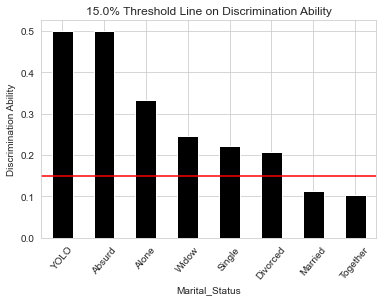

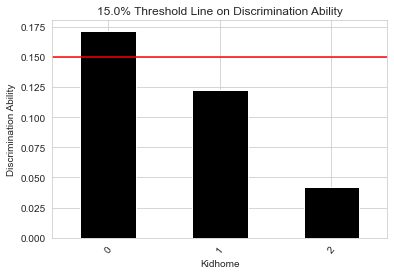

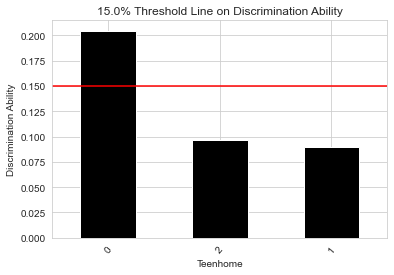

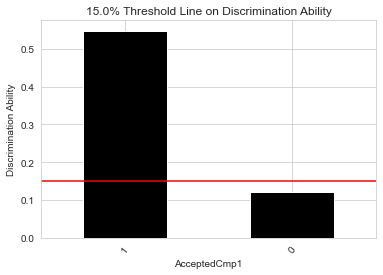

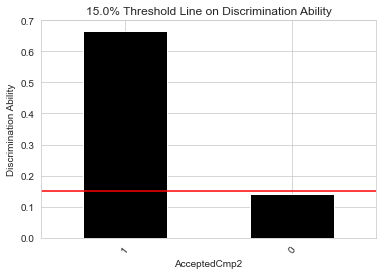

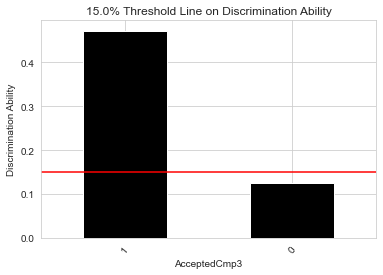

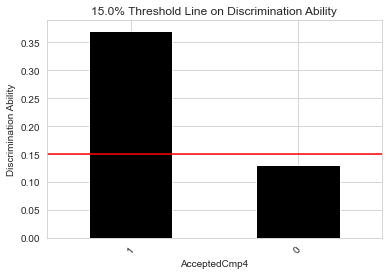

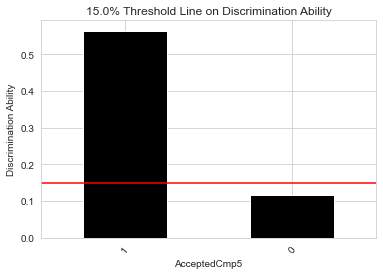

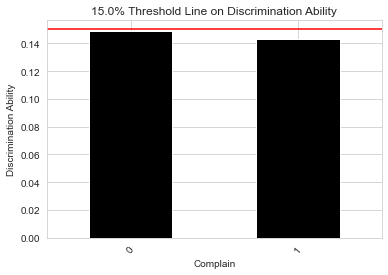

In [16]:
def cat_feat_plot(df, fc, target, thresh):

    sns.set_style("whitegrid")

    if (type(fc)==str):
        plot_df = cat_feat_describe(df, fc, target, 50, thresh).iloc[:,1]

        plot_df = plot_df.sort_values(ascending=False)

        ax = plot_df.plot.bar(color="black", title="{}% Threshold Line on Discrimination Ability".format(thresh*100), legend=False)
        ax.set_ylabel("Discrimination Ability", size = 10)
        ax.axhline(y=thresh, color="red")
        ax.set_xticklabels(plot_df.index, rotation=50, size=10)


        plt.show()
        
        
        
    else:
        for feat in fc:
            plot_df = cat_feat_describe(df, feat, target, 50, thresh).iloc[:,1]

            plot_df = plot_df.sort_values(ascending=False)

            
            ax = plot_df.plot.bar(color="black", title="{}% Threshold Line on Discrimination Ability".format(thresh*100), legend=False)
            ax.set_ylabel("Discrimination Ability", size = 10)
            ax.axhline(y=thresh, color="red")
            ax.set_xticklabels(plot_df.index, rotation=50, size=10)

            plt.show()
        
        
        
        
        
    
cat_feat_plot(df, feat_c, "Response", 0.15)

`Education`

    : PhD and Master are above the 15% Discrimination Ability threshold.
    
`MaritalStatus`

    : Only Married and Together are below the threshold.
    
`KidHome`

    & TeenHome
    : Only the clients with zero children or teen show a high discrimination ability.
    
`AcceptedCampaign`

    : All of the 5 previous campaigns show that, as expected, the clients which accepted the campaigns show discrimination ability above the threshold.
    
`Complain`

    : While both who does and does not registered complains show high discrimination ability, only the ones who did complain show a discrimination ability higher than the threshold.

In [17]:
#grouping based on marital_status
df.groupby("Marital_Status").count().index

Index(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO'],
      dtype='object', name='Marital_Status')

In [18]:
#Numerical Variables Analysis

def days_since(dates_series, date_format):

    n = len(dates_series)
    
    result = [0] * n

    for i in range(n):
        result[i] = (datetime.today()-datetime.strptime(dates_series[i], date_format)).days
    
    return result



df["Days_Customer"] = days_since(list(df.Dt_Customer), "%Y-%m-%d")

df = df.drop(columns="Dt_Customer")

df["Days_Customer"].head()

0    3090
1    2540
2    2739
3    2566
4    2588
Name: Days_Customer, dtype: int64

In [19]:
#Variables with zero variance (constants)
feat_n = list(df.columns)

feat_n = list(filter(lambda x: x not in feat_c, feat_n))

feat_n.remove("ID") # Removing ID.

std = df[feat_n].describe().iloc[2,:]
const_lab = [std[std<0.05].index[0], std[std<0.05].index[1]]
std[std<0.05]



Z_CostContact    0.0
Z_Revenue        0.0
Name: std, dtype: float64

In [20]:
#Removing constant variables

df.drop(labels=const_lab, axis=1, inplace=True) # Now data_ does not contain zero variance variables.
feat_n = list(filter(lambda x: x not in const_lab, feat_n))

<AxesSubplot:>

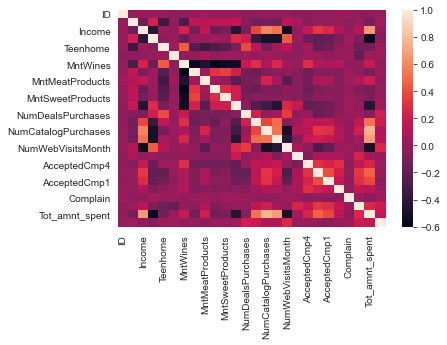

In [21]:
# Visualization of the correlation between the features.
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

In [22]:
# one hot encoding the nominal categorical feature 'last_purchase_day_type'
enc_feature_df = pd.get_dummies(df['last_purchase_day_type'],prefix='last_purchase_day_type', prefix_sep='_')
df = pd.concat([enc_feature_df,df], axis=1)
df.drop('last_purchase_day_type', axis=1, inplace=True)

# label encoding
# importing required libraies
from sklearn.preprocessing import LabelEncoder
df['Education'] = LabelEncoder().fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_Status'] = LabelEncoder().fit_transform(df['Marital_Status'].values.reshape(-1,1))

In [25]:
# making our x and y data
x=df.drop('Response',axis=1)
y=df.Response

In [26]:
print(x.shape)
print(y.shape)

(2240, 29)
(2240,)


In [27]:
#splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

### KNN

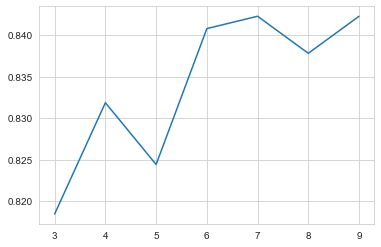

In [30]:
list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [31]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [34]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
list1.append(acc_knn)
print(cm)
print(acc_knn)

[[543  21]
 [ 97  11]]
0.8244047619047619


### Random Forest

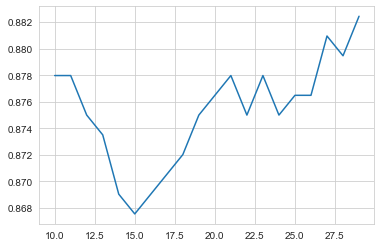

In [35]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()


In [36]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [37]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

In [38]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
list1.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[554  10]
 [ 79  29]]
0.8675595238095238


### XGBoost

In [39]:

xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=10,) #random_state=10)
xgb_model.fit(x_train, y_train)



[14:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred = xgb_model.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[557   7]
 [ 74  34]]


In [41]:
accuracy_score(y_test,y_pred)

0.8794642857142857

### Analysis

    - After trying multiple models we can state that XGBoost gives maximum accuracy.